# (K) Nearest Neighbours - Crimes Dataset

https://scikit-activeml.github.io/scikit-activeml-docs/generated/api/skactiveml.visualization.plot_decision_boundary.html
https://github.com/scikit-activeml/scikit-activeml
https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html
http://localhost:8888/notebooks/OneDrive/AY2022%20Y3S2%20Exchange/Machine%20Learning%201/Practicals/Practical%206/P6.ipynb

## Importing packages and loading necessary dataset

In [3]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
from shapely.geometry import Point
from sklearn.model_selection import train_test_split, GridSearchCV
import time
from sklearn.metrics import mean_absolute_error, mean_squared_error
import plotting
import skactiveml.visualization as skactive
from skactiveml.visualization import plot_decision_boundary

In [4]:
crimes_df = pd.read_csv("crimes_processed_vehicle.csv")

In [6]:
crimes_df

Latitude  Longitude         n  location_id
0      41.644590 -87.615880  0.000000            1
1      41.647037 -87.616647  0.000000            2
2      41.647039 -87.616098  0.693147            3
3      41.647180 -87.544241  0.000000            4
4      41.647716 -87.542811  0.000000            5
...          ...        ...       ...          ...
25449  42.022526 -87.672401  0.000000        25450
25450  42.022529 -87.666324  0.000000        25451
25451  42.022535 -87.673398  0.693147        25452
25452  42.022536 -87.673711  0.000000        25453
25453  42.022548 -87.676139  0.000000        25454

[25454 rows x 4 columns]

# Crimes Dataset

## Splitting Data

First, we will be splitting the data into training and test datsaset. Whereby the training data is used to train the model and conduct cross validation, while the test data is used to evaluate the performance of the trained model obtained from the training data. 

In [7]:
# Convert columns to numpy arrays
observed_location_columns_crimes = ['Latitude', 'Longitude']
observed_values_column_crimes = 'n'
observed_locations_crimes = crimes_df[observed_location_columns_crimes].values
observed_values_crimes = crimes_df[observed_values_column_crimes].values

X_train_meuse and y_train_meuse are the training data whereby X_train_meuse contains the spatial information i.e Data Coordinates and the y_train_meuse will be sampled values of each data coordinates in X_train_meuse. The same is done for the test data. 

In [8]:
X_train_crimes, X_test_crimes, y_train_crimes, y_test_crimes = train_test_split(observed_locations_crimes,
                                                                            observed_values_crimes, test_size=0.2, random_state=0)
print(f"X_train_crimes.shape: {X_train_crimes.shape}")
print(f"X_test_crimes.shape:  {X_test_crimes.shape}")
print(f"y_train_crimes.shape: {y_train_crimes.shape}")
print(f"y_test_crimes.shape:  {y_test_crimes.shape}")

X_train_crimes.shape: (20363, 2)
X_test_crimes.shape:  (5091, 2)
y_train_crimes.shape: (20363,)
y_test_crimes.shape:  (5091,)


## K-Fold Cross Validation

Now we will train and cross validate the model using the training data. GridSearchCV is used whereby we pass in the model we will be using (K Nearest Nieghbours AKA KNeighborsRegressor()), along with the list of hyperparameters we would like to tune, it would then conduct K-Fold Cross validation and return the model with best hyperparamter configuration. It can also return the mean cross validation score of the best model it has found. In our approach, we will use 1 scoring metric/method for the namely Mean Absolute Percentage Error to determine how the best hyperparamter configuration can be determined. i.e GridSearchCV will score each K-Fold of cross validation for each hyperparameter configuration using this metric, and return us the model with the best hyperparameter configuration or with the lowest Mean Absolute Percentage Error it has seen.

However, I have also included other scoring metrics such as RMSE and MAE, as GridSearchCV is able to conduct multi-metric evaluation as well. By doing so, we can obtain the scores obtained for each of these metrics as well and conduct further analysis. The computational time is also calculated as it can be useful for comparison across the different spatial interpolation methods later on.

https://scikit-learn.org/stable/modules/cross_validation.html#leave-one-out-loo (Reason why K-Fold preferred)

In [9]:
# Define the range of n_neighbors for hyperparameter tuning
neighbors_range = range(10, 1600, 160)
nn_model = KNeighborsRegressor()
parameters = [
    {'n_neighbors': neighbors_range}
]

scoring_methods = ['neg_mean_absolute_percentage_error', 'neg_root_mean_squared_error', 'neg_mean_absolute_error']
clf = GridSearchCV(cv=5, estimator = nn_model, param_grid = parameters, return_train_score=True, scoring= scoring_methods, refit = 'neg_mean_absolute_percentage_error')

start_time = time.time()

clf.fit(X_train_crimes, y_train_crimes)

end_time = time.time()

print(f"Computation Time: {end_time - start_time:.2f} seconds")

Computation Time: 108.37 seconds


## Hyperparameter selection

Here, we can understand how GridSearch CV came to the conclusion of which hyperparameter configuration would provide the best model by analysing the cv_results_, which is a dataframe of the training and cross validated scores it has obtained in the process.

In [10]:
cv_results_df = pd.DataFrame(clf.cv_results_)
display(cv_results_df)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.012402      0.013304         0.012014        0.001677   
1       0.006407      0.000797         0.093993        0.003168   
2       0.005798      0.000400         0.181191        0.009287   
3       0.005597      0.000489         0.270997        0.008080   
4       0.005801      0.000399         0.363795        0.004616   
5       0.005599      0.000489         0.438188        0.010657   
6       0.006795      0.000742         0.580995        0.034399   
7       0.007999      0.001672         0.718012        0.020510   
8       0.006806      0.000739         0.836184        0.054255   
9       0.005406      0.000499         0.794002        0.019371   

  param_n_neighbors                 params  \
0                10    {'n_neighbors': 10}   
1               170   {'n_neighbors': 170}   
2               330   {'n_neighbors': 330}   
3               490   {'n_neighbors': 490}   
4               650   {'n_neighbors': 650}   
5               810   {'n_neighbors': 810}   
6               970   {'n_neighbors': 970}   
7              1130  {'n_neighbors': 1130}   
8              1290  {'n_neighbors': 1290}   
9              1450  {'n_neighbors': 1450}   

   split0_test_neg_mean_absolute_percentage_error  \
0                                   -4.215749e+14   
1                                   -4.231322e+14   
2                                   -4.243960e+14   
3                                   -4.258503e+14   
4                                   -4.269112e+14   
5                                   -4.269892e+14   
6                                   -4.265134e+14   
7                                   -4.267009e+14   
8                                   -4.269059e+14   
9                                   -4.272531e+14   

   split1_test_neg_mean_absolute_percentage_error  \
0                                   -4.285849e+14   
1                                   -4.276127e+14   
2                                   -4.258687e+14   
3                                   -4.260404e+14   
4                                   -4.265332e+14   
5                                   -4.277722e+14   
6                                   -4.284032e+14   
7                                   -4.296884e+14   
8                                   -4.307350e+14   
9                                   -4.311614e+14   

   split2_test_neg_mean_absolute_percentage_error  \
0                                   -4.043242e+14   
1                                   -4.096098e+14   
2                                   -4.127362e+14   
3                                   -4.153283e+14   
4                                   -4.170276e+14   
5                                   -4.170948e+14   
6                                   -4.171267e+14   
7                                   -4.182967e+14   
8                                   -4.190293e+14   
9                                   -4.194926e+14   

   split3_test_neg_mean_absolute_percentage_error  ...  \
0                                   -4.410536e+14  ...   
1                                   -4.375633e+14  ...   
2                                   -4.370855e+14  ...   
3                                   -4.376574e+14  ...   
4                                   -4.375098e+14  ...   
5                                   -4.379253e+14  ...   
6                                   -4.385364e+14  ...   
7                                   -4.386560e+14  ...   
8                                   -4.383526e+14  ...   
9                                   -4.385100e+14  ...   

   mean_test_neg_mean_absolute_error  std_test_neg_mean_absolute_error  \
0                          -0.188727                          0.002428   
1                          -0.190603                          0.001804   
2                          -0.191162                          0.001831   
3                          -0.191617                          0.001940 

We can see that the optimal number of neighbours chosen is 5 by GridSearchCV.

In [11]:
print(f"Dataset: {clf.best_params_}")
print(f"Mean Cross-Validated Score of Best Estimator (Mean Absolute Percentage Error): {-clf.best_score_}")
columns = ['param_n_neighbors','mean_test_neg_mean_absolute_percentage_error','rank_test_neg_mean_absolute_percentage_error',
           'mean_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_error',
            'mean_test_neg_root_mean_squared_error', 'rank_test_neg_root_mean_squared_error']
filter_df = cv_results_df[columns]
display(filter_df)

Dataset: {'n_neighbors': 10}
Mean Cross-Validated Score of Best Estimator (Mean Absolute Percentage Error): 424881800766687.1


param_n_neighbors  mean_test_neg_mean_absolute_percentage_error  \
0                10                                 -4.248818e+14   
1               170                                 -4.264381e+14   
2               330                                 -4.269935e+14   
3               490                                 -4.280682e+14   
4               650                                 -4.290521e+14   
5               810                                 -4.295786e+14   
6               970                                 -4.299270e+14   
7              1130                                 -4.307263e+14   
8              1290                                 -4.311748e+14   
9              1450                                 -4.315369e+14   

   rank_test_neg_mean_absolute_percentage_error  \
0                                             1   
1                                             2   
2                                             3   
3                                             4   
4                                             5   
5                                             6   
6                                             7   
7                                             8   
8                                             9   
9                                            10   

   mean_test_neg_mean_absolute_error  rank_test_neg_mean_absolute_error  \
0                          -0.188727                                  1   
1                          -0.190603                                  2   
2                          -0.191162                                  3   
3                          -0.191617                                  4   
4                          -0.192025                                  5   
5                          -0.192326                                  6   
6                          -0.192582                                  7   
7                          -0.192865                                  8   
8                          -0.193075                                  9   
9                          -0.193225                                 10   

   mean_test_neg_root_mean_squared_error  \
0                              -0.333461   
1                              -0.321957   
2                              -0.322310   
3                              -0.322712   
4                              -0.323063   
5                              -0.323364   
6                              -0.323706   
7                              -0.323919   
8                              -0.324113   
9                              -0.324190   

   rank_test_neg_root_mean_squared_error  
0                                     10  
1                                      1  
2                                      2  
3                                      3  
4                                      4  
5                                      5  
6                                      6  
7                                      7  
8                                      8  
9                                      9

We can see that across all 3 scoring metrics, 5 is the best hyperparameter configuration chosen by GridSearchCV based on the rankings given.

In [12]:
rank_columns = ['param_n_neighbors','rank_test_neg_mean_absolute_percentage_error',
                'rank_test_neg_mean_absolute_error','rank_test_neg_root_mean_squared_error']
rank_df = cv_results_df[rank_columns]
display(rank_df)

param_n_neighbors  rank_test_neg_mean_absolute_percentage_error  \
0                10                                             1   
1               170                                             2   
2               330                                             3   
3               490                                             4   
4               650                                             5   
5               810                                             6   
6               970                                             7   
7              1130                                             8   
8              1290                                             9   
9              1450                                            10   

   rank_test_neg_mean_absolute_error  rank_test_neg_root_mean_squared_error  
0                                  1                                     10  
1                                  2                                      1  
2                                  3                                      2  
3                                  4                                      3  
4                                  5                                      4  
5                                  6                                      5  
6                                  7                                      6  
7                                  8                                      7  
8                                  9                                      8  
9                                 10                                      9

We can also plot the Validation curve against the training curve to determine if there is any overfitting in the model chosen by GridSearchCV.

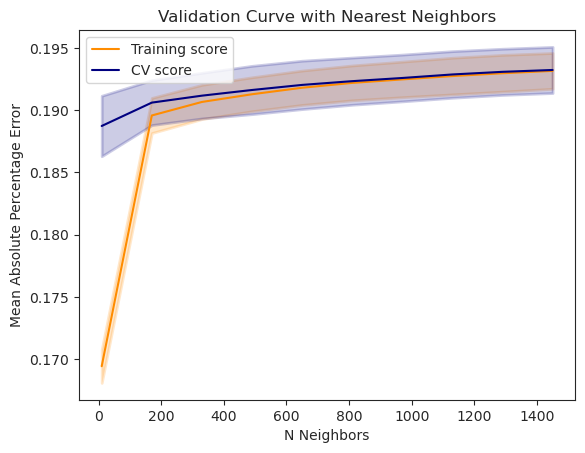

In [13]:
mean_train_score = -clf.cv_results_['mean_train_neg_mean_absolute_error']
mean_test_score = -clf.cv_results_['mean_test_neg_mean_absolute_error'] #this is the validation score 
std_train_score = clf.cv_results_['std_train_neg_mean_absolute_error']
std_test_score = clf.cv_results_['std_test_neg_mean_absolute_error']

plt.plot(neighbors_range, mean_train_score, color='darkorange', label='Training score')
plt.fill_between(
    neighbors_range,
    mean_train_score - std_train_score,
    mean_train_score + std_train_score,
    alpha=0.2,
    color="darkorange",
    lw=2,
)
plt.plot(neighbors_range, mean_test_score, color='navy', label='CV score')
plt.fill_between(
    neighbors_range,
    mean_test_score - std_test_score,
    mean_test_score + std_test_score,
    alpha=0.2,
    color="navy",
    lw=2,
)

plt.xlabel('N Neighbors')
plt.ylabel('Mean Absolute Percentage Error')
#plt.yscale('log')
plt.legend()
plt.title("Validation Curve with Nearest Neighbors")
plt.show()

## Evaluation of Model (Testing Chosen model)

Now, we will use the test data namely X_test_meuse and y_test_meuse to evaluate the model's performance. We will evaluate on a few different scoring metrics for more comprehensive analysis between different spatial interpolation methods afterwards

### Performance Metrics of Model

We can include in the test score in the previous plot obtained to have an overall big picture.

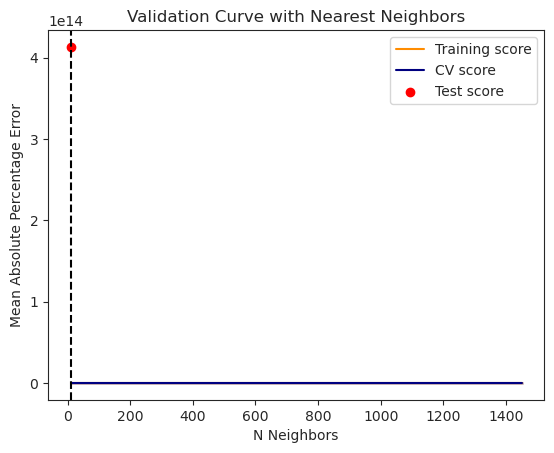

In [14]:
mean_train_score = -clf.cv_results_['mean_train_neg_mean_absolute_error']
mean_test_score = -clf.cv_results_['mean_test_neg_mean_absolute_error'] #this is the validation score 
std_train_score = clf.cv_results_['std_train_neg_mean_absolute_error']
std_test_score = clf.cv_results_['std_test_neg_mean_absolute_error']

plt.plot(neighbors_range, mean_train_score, color='darkorange', label='Training score')
plt.fill_between(
    neighbors_range,
    mean_train_score - std_train_score,
    mean_train_score + std_train_score,
    alpha=0.2,
    color="darkorange",
    lw=2,
)
plt.plot(neighbors_range, mean_test_score, color='navy', label='CV score')
plt.fill_between(
    neighbors_range,
    mean_test_score - std_test_score,
    mean_test_score + std_test_score,
    alpha=0.2,
    color="navy",
    lw=2,
)

test_score = -clf.score(X_test_crimes, y_test_crimes)
best_n = clf.best_params_['n_neighbors']
plt.axvline(best_n, c='k', ls='--')
plt.scatter(best_n, test_score, c='r', label='Test score')

plt.xlabel('N Neighbors')
plt.ylabel('Mean Absolute Percentage Error')
#plt.yscale('log')
plt.legend()
plt.title("Validation Curve with Nearest Neighbors")
plt.show()

We can also see how the model performs on the test set using the 2 other metrics RMSE and MAE.

In [15]:
y_pred_crimes = clf.best_estimator_.predict(X_test_crimes)
mae = mean_absolute_error(y_test_crimes, y_pred_crimes)
rmse = np.sqrt(mean_squared_error(y_test_crimes, y_pred_crimes))
print("MAPE:", round(test_score,3))
print("MAE:", round(mae,3))
print("RMSE:", round(rmse,3))

MAPE: 413362372166481.5
MAE: 0.186
RMSE: 0.332


### Plotting Spatial Interpolation of entire area with Model

Now, we will plot the entire spatially interpolated values of the entire surface to analyze the spatial distribution. Previously, we have found the best hyperparameter configuration which is where number of neighbors = 5, thus we will refit the model with the entire dataset with this hyperparamater configuration to plot the entire area spatially interpolated.

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor (Kneighbors package used)

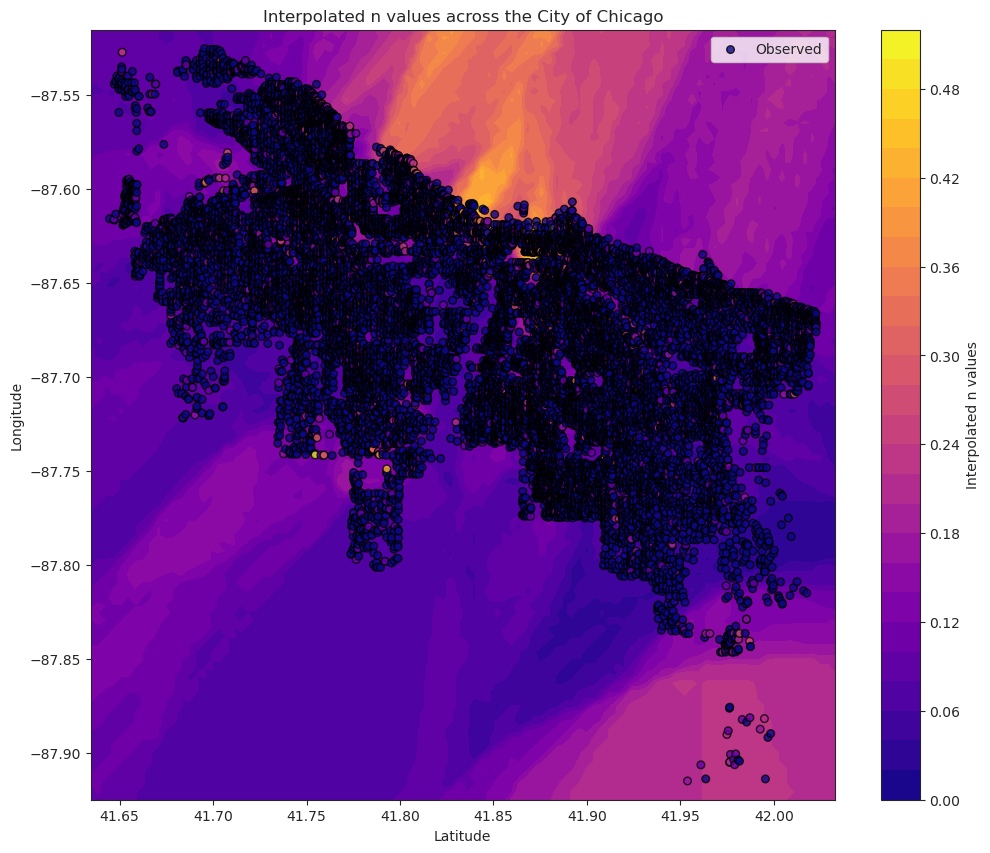

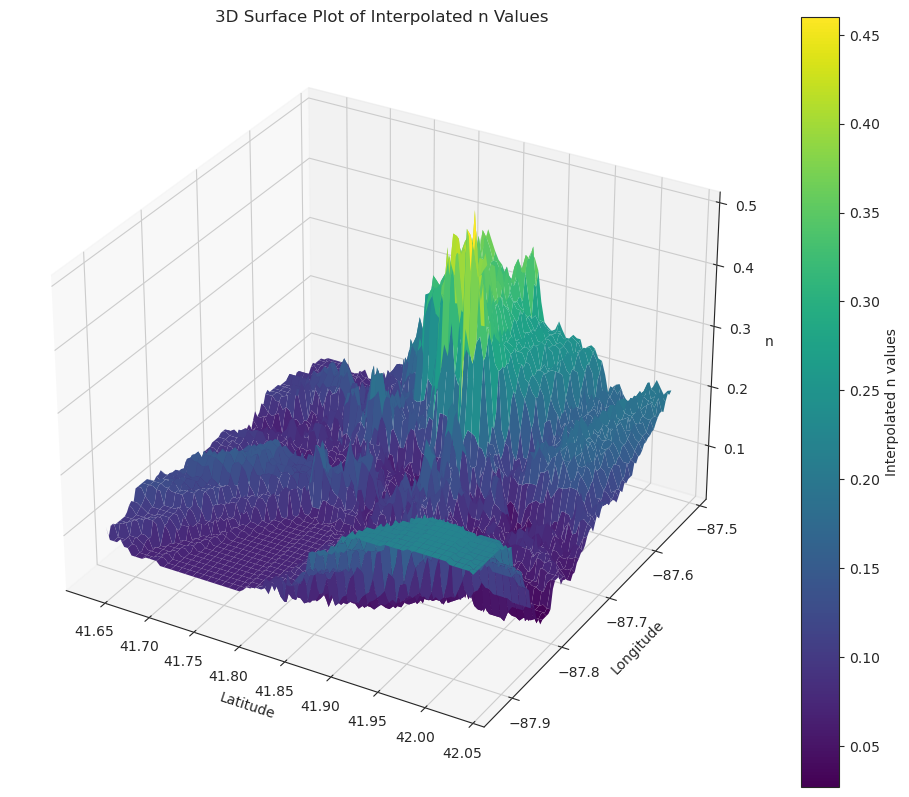

Spatial Interpolation Computation Time: 0.29 seconds


In [17]:
# Convert columns to numpy arrays
observed_location_columns = ['Latitude', 'Longitude']
observed_values_column = 'n'
observed_locations = crimes_df[observed_location_columns].values
observed_values = crimes_df[observed_values_column].values

# Number of nearest neighbors to consider
n_neighbors = 170

# Initialize NearestNeighbors model
nn_model = KNeighborsRegressor(n_neighbors=n_neighbors)

# Start timing spatial interpolation
start_time_interpolation = time.time()

# Perform spatial interpolation over the entire dataset for visualization
nn_model.fit(observed_locations,observed_values)  # Re-fit model using all data

# Adjust the zoom by reducing the buffer around the min and max values
buffer = 0.01  # Smaller buffer to zoom in closer
x_min, x_max = observed_locations[:, 0].min() - buffer, observed_locations[:, 0].max() + buffer
y_min, y_max = observed_locations[:, 1].min() - buffer, observed_locations[:, 1].max() + buffer

x_range = np.linspace(x_min, x_max, 100)
y_range = np.linspace(y_min, y_max, 100)
x_grid, y_grid = np.meshgrid(x_range, y_range)
grid_points = np.c_[x_grid.ravel(), y_grid.ravel()]

# Find nearest neighbors for the grid points
distances, indices = nn_model.kneighbors(grid_points)

# Interpolate values
interpolated_values = np.mean(observed_values[indices], axis=1)
z_grid = interpolated_values.reshape(x_grid.shape)

end_time_interpolation = time.time()  # End timing spatial interpolation


fig = plt.figure(figsize=(12, 10))

from mpl_toolkits.mplot3d import Axes3D

plt.contourf(x_grid, y_grid, z_grid, cmap='plasma', levels=30)
plt.colorbar(label='Interpolated n values')
plt.scatter(crimes_df['Latitude'],crimes_df['Longitude'], c=crimes_df['n'], cmap='plasma', edgecolor='k', label='Observed', marker='o', s=30, alpha=0.8)

plt.xlim(x_min, x_max)  # Set x-axis limits
plt.ylim(y_min, y_max)  # Set y-axis limits

plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.legend()
plt.title('Interpolated n values across the City of Chicago')
plt.show()

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(x_grid, y_grid, z_grid, cmap='viridis', edgecolor='none')
fig.colorbar(surf, ax=ax, label='Interpolated n values')
ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')
ax.set_zlabel('n')
ax.set_title('3D Surface Plot of Interpolated n Values')
plt.show()

print(f"Spatial Interpolation Computation Time: {end_time_interpolation - start_time_interpolation:.2f} seconds")




# Extra Code

In [ ]:
print("Validation scores for each metric for each value of n neighbors")
print(clf.cv_results_['mean_test_neg_mean_absolute_percentage_error'])
print(np.mean(clf.cv_results_['mean_test_neg_mean_absolute_percentage_error']))
print(clf.cv_results_['mean_test_neg_root_mean_squared_error'])
print(np.mean(clf.cv_results_['mean_test_neg_root_mean_squared_error']))
print(clf.cv_results_['mean_test_neg_mean_absolute_error'])
print(np.mean(clf.cv_results_['mean_test_neg_mean_absolute_error']))

## neighbours range = 1 to 10

In [19]:
# Convert columns to numpy arrays
observed_location_columns = ['Latitude', 'Longitude']
observed_values_column = 'n'
observed_locations = crimes_df[observed_location_columns].values
observed_values = crimes_df[observed_values_column].values

# Define the range of n_neighbors to test
neighbors_range = range(1, 10)

# Initialize dictionary to store performance metrics for each n_neighbors value
performance_metrics = {}

for n_neighbors in neighbors_range:
    nn_model = NearestNeighbors(n_neighbors=n_neighbors)
    true_values = []
    predictions = []

    # Start timing LOOCV for the current n_neighbors
    start_time_loocv = time.time()

    # Perform LOOCV
    for loo_idx in range(observed_locations.shape[0]):
        train_idx = np.arange(observed_locations.shape[0]) != loo_idx
        test_idx = np.arange(observed_locations.shape[0]) == loo_idx
        
        train_locations = observed_locations[train_idx]
        train_values = observed_values[train_idx]
        test_location = observed_locations[test_idx].reshape(1, -1)
        test_value = observed_values[test_idx]
        
        nn_model.fit(train_locations)
        distances, indices = nn_model.kneighbors(test_location)
        predicted_value = np.mean(train_values[indices])
        
        true_values.append(test_value[0])
        predictions.append(predicted_value)

    # Calculate and store performance metrics for the current n_neighbors
    mae = mean_absolute_error(true_values, predictions)
    rmse = np.sqrt(mean_squared_error(true_values, predictions))
    performance_metrics[n_neighbors] = {'MAE': mae, 'RMSE': rmse}

    # End timing LOOCV
    end_time_loocv = time.time()
    print(f"n_neighbors: {n_neighbors}, MAE: {mae:.2f}, RMSE: {rmse:.2f}, Computation Time: {end_time_loocv - start_time_loocv:.2f} seconds")


n_neighbors: 1, MAE: 0.38, RMSE: 1.23, Computation Time: 255.47 seconds
n_neighbors: 2, MAE: 0.37, RMSE: 1.06, Computation Time: 256.05 seconds
n_neighbors: 3, MAE: 0.37, RMSE: 1.01, Computation Time: 254.60 seconds
n_neighbors: 4, MAE: 0.36, RMSE: 0.98, Computation Time: 262.01 seconds
n_neighbors: 5, MAE: 0.36, RMSE: 0.96, Computation Time: 256.65 seconds
n_neighbors: 6, MAE: 0.36, RMSE: 0.95, Computation Time: 269.43 seconds
n_neighbors: 7, MAE: 0.36, RMSE: 0.94, Computation Time: 262.72 seconds
n_neighbors: 8, MAE: 0.36, RMSE: 0.93, Computation Time: 264.82 seconds
n_neighbors: 9, MAE: 0.36, RMSE: 0.93, Computation Time: 227.93 seconds


## neighbours range = 160 to 1600

In [20]:
# Convert columns to numpy arrays
observed_location_columns = ['Latitude', 'Longitude']
observed_values_column = 'n'
observed_locations = crimes_df[observed_location_columns].values
observed_values = crimes_df[observed_values_column].values

# Define the range of n_neighbors to test
neighbors_range = range(160, 1600, 160)

# Initialize dictionary to store performance metrics for each n_neighbors value
performance_metrics = {}

for n_neighbors in neighbors_range:
    nn_model = NearestNeighbors(n_neighbors=n_neighbors)
    true_values = []
    predictions = []

    # Start timing LOOCV for the current n_neighbors
    start_time_loocv = time.time()

    # Perform LOOCV
    for loo_idx in range(observed_locations.shape[0]):
        train_idx = np.arange(observed_locations.shape[0]) != loo_idx
        test_idx = np.arange(observed_locations.shape[0]) == loo_idx
        
        train_locations = observed_locations[train_idx]
        train_values = observed_values[train_idx]
        test_location = observed_locations[test_idx].reshape(1, -1)
        test_value = observed_values[test_idx]
        
        nn_model.fit(train_locations)
        distances, indices = nn_model.kneighbors(test_location)
        predicted_value = np.mean(train_values[indices])
        
        true_values.append(test_value[0])
        predictions.append(predicted_value)

    # Calculate and store performance metrics for the current n_neighbors
    mae = mean_absolute_error(true_values, predictions)
    rmse = np.sqrt(mean_squared_error(true_values, predictions))
    performance_metrics[n_neighbors] = {'MAE': mae, 'RMSE': rmse}

    # End timing LOOCV
    end_time_loocv = time.time()
    print(f"n_neighbors: {n_neighbors}, MAE: {mae:.2f}, RMSE: {rmse:.2f}, Computation Time: {end_time_loocv - start_time_loocv:.2f} seconds")


n_neighbors: 160, MAE: 0.36, RMSE: 0.89, Computation Time: 194.59 seconds
n_neighbors: 320, MAE: 0.36, RMSE: 0.89, Computation Time: 198.88 seconds
n_neighbors: 480, MAE: 0.36, RMSE: 0.89, Computation Time: 198.42 seconds
n_neighbors: 640, MAE: 0.37, RMSE: 0.90, Computation Time: 198.58 seconds
n_neighbors: 800, MAE: 0.37, RMSE: 0.90, Computation Time: 200.36 seconds
n_neighbors: 960, MAE: 0.37, RMSE: 0.90, Computation Time: 197.05 seconds
n_neighbors: 1120, MAE: 0.37, RMSE: 0.90, Computation Time: 199.29 seconds
n_neighbors: 1280, MAE: 0.37, RMSE: 0.90, Computation Time: 199.46 seconds
n_neighbors: 1440, MAE: 0.37, RMSE: 0.90, Computation Time: 198.13 seconds


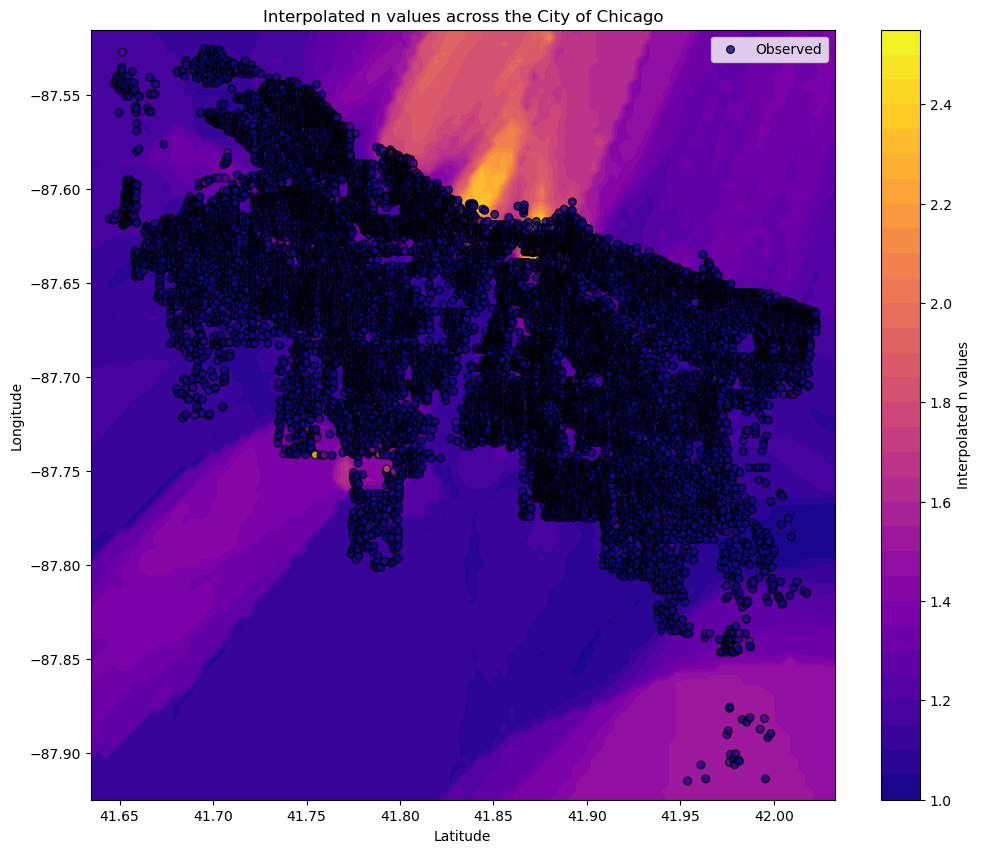

Spatial Interpolation Computation Time: 0.30 seconds


In [58]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import NearestNeighbors
import time

# Assuming 'crimes_df' is your DataFrame containing the data

# Convert columns to numpy arrays
observed_location_columns = ['Latitude', 'Longitude']
observed_values_column = 'n'
observed_locations = crimes_df[observed_location_columns].values
observed_values = crimes_df[observed_values_column].values

# Number of nearest neighbors to consider
n_neighbors = 160

# Initialize NearestNeighbors model
nn_model = NearestNeighbors(n_neighbors=n_neighbors)

# Start timing spatial interpolation
start_time_interpolation = time.time()

# Perform spatial interpolation over the entire dataset for visualization
nn_model.fit(observed_locations)  # Re-fit model using all data

# Adjust the zoom by reducing the buffer around the min and max values
buffer = 0.01  # Smaller buffer to zoom in closer
x_min, x_max = observed_locations[:, 0].min() - buffer, observed_locations[:, 0].max() + buffer
y_min, y_max = observed_locations[:, 1].min() - buffer, observed_locations[:, 1].max() + buffer

x_range = np.linspace(x_min, x_max, 100)
y_range = np.linspace(y_min, y_max, 100)
x_grid, y_grid = np.meshgrid(x_range, y_range)
grid_points = np.c_[x_grid.ravel(), y_grid.ravel()]

# Find nearest neighbors for the grid points
distances, indices = nn_model.kneighbors(grid_points)

# Interpolate values
interpolated_values = np.mean(observed_values[indices], axis=1)
z_grid = interpolated_values.reshape(x_grid.shape)

end_time_interpolation = time.time()  # End timing spatial interpolation

# Visualization
plt.figure(figsize=(12, 10))  # Adjusted figure size for standard display
plt.contourf(x_grid, y_grid, z_grid, cmap='plasma', levels=30)
plt.colorbar(label='Interpolated n values')
plt.scatter(crimes_df['Latitude'],crimes_df['Longitude'], c=crimes_df['n'], cmap='plasma', edgecolor='k', label='Observed', marker='o', s=30, alpha=0.8)

plt.xlim(x_min, x_max)  # Set x-axis limits
plt.ylim(y_min, y_max)  # Set y-axis limits

plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.legend()
plt.title('Interpolated n values across the City of Chicago')
plt.show()

print(f"Spatial Interpolation Computation Time: {end_time_interpolation - start_time_interpolation:.2f} seconds")


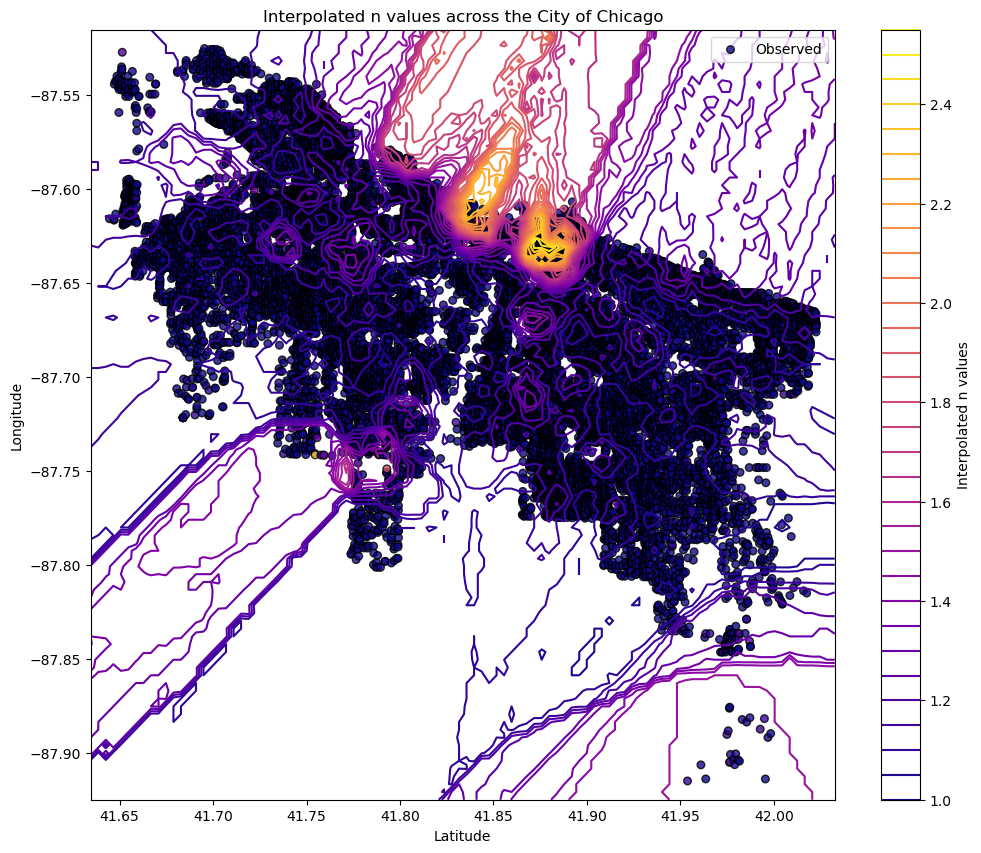

Spatial Interpolation Computation Time: 0.32 seconds


In [71]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import NearestNeighbors
import time

# Assuming 'crimes_df' is your DataFrame containing the data

# Convert columns to numpy arrays
observed_location_columns = ['Latitude', 'Longitude']
observed_values_column = 'n'
observed_locations = crimes_df[observed_location_columns].values
observed_values = crimes_df[observed_values_column].values

# Number of nearest neighbors to consider
n_neighbors = 160

# Initialize NearestNeighbors model
nn_model = NearestNeighbors(n_neighbors=n_neighbors)

# Start timing spatial interpolation
start_time_interpolation = time.time()

# Perform spatial interpolation over the entire dataset for visualization
nn_model.fit(observed_locations)  # Re-fit model using all data

# Adjust the zoom by reducing the buffer around the min and max values
buffer = 0.01  # Smaller buffer to zoom in closer
x_min, x_max = observed_locations[:, 0].min() - buffer, observed_locations[:, 0].max() + buffer
y_min, y_max = observed_locations[:, 1].min() - buffer, observed_locations[:, 1].max() + buffer

x_range = np.linspace(x_min, x_max, 100)
y_range = np.linspace(y_min, y_max, 100)
x_grid, y_grid = np.meshgrid(x_range, y_range)
grid_points = np.c_[x_grid.ravel(), y_grid.ravel()]

# Find nearest neighbors for the grid points
distances, indices = nn_model.kneighbors(grid_points)

# Interpolate values
interpolated_values = np.mean(observed_values[indices], axis=1)
z_grid = interpolated_values.reshape(x_grid.shape)

end_time_interpolation = time.time()  # End timing spatial interpolation

# Visualization
plt.figure(figsize=(12, 10))  # Adjusted figure size for standard display
plt.contour(x_grid, y_grid, z_grid, cmap='plasma', levels=30)
plt.colorbar(label='Interpolated n values')
plt.scatter(crimes_df['Latitude'],crimes_df['Longitude'], c=crimes_df['n'], cmap='plasma', edgecolor='k', label='Observed', marker='o', s=30, alpha=0.8)

plt.xlim(x_min, x_max)  # Set x-axis limits
plt.ylim(y_min, y_max)  # Set y-axis limits

plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.legend()
plt.title('Interpolated n values across the City of Chicago')
plt.show()

print(f"Spatial Interpolation Computation Time: {end_time_interpolation - start_time_interpolation:.2f} seconds")


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import NearestNeighbors
import time

# Assuming 'crimes_df' is your DataFrame containing the data

# Convert columns to numpy arrays
observed_location_columns = ['Latitude', 'Longitude']
observed_values_column = 'n'
observed_locations = crimes_df[observed_location_columns].values
observed_values = crimes_df[observed_values_column].values

# Number of nearest neighbors to consider
n_neighbors = 160

# Initialize NearestNeighbors model
nn_model = NearestNeighbors(n_neighbors=n_neighbors)

# Start timing spatial interpolation
start_time_interpolation = time.time()

# Perform spatial interpolation over the entire dataset for visualization
nn_model.fit(observed_locations)  # Re-fit model using all data

# Adjust the zoom by reducing the buffer around the min and max values
buffer = 0.01  # Smaller buffer to zoom in closer
x_min, x_max = observed_locations[:, 0].min() - buffer, observed_locations[:, 0].max() + buffer
y_min, y_max = observed_locations[:, 1].min() - buffer, observed_locations[:, 1].max() + buffer

x_range = np.linspace(x_min, x_max, 100)
y_range = np.linspace(y_min, y_max, 100)
x_grid, y_grid = np.meshgrid(x_range, y_range)
grid_points = np.c_[x_grid.ravel(), y_grid.ravel()]

# Find nearest neighbors for the grid points
distances, indices = nn_model.kneighbors(grid_points)

# Interpolate values
interpolated_values = np.mean(observed_values[indices], axis=1)
z_grid = interpolated_values.reshape(x_grid.shape)

end_time_interpolation = time.time()  # End timing spatial interpolation


fig = plt.figure(figsize=(12, 10))

from mpl_toolkits.mplot3d import Axes3D

plt.contourf(x_grid, y_grid, z_grid, cmap='plasma', levels=30)
plt.colorbar(label='Interpolated n values')
plt.scatter(crimes_df['Latitude'],crimes_df['Longitude'], c=crimes_df['n'], cmap='plasma', edgecolor='k', label='Observed', marker='o', s=30, alpha=0.8)

plt.xlim(x_min, x_max)  # Set x-axis limits
plt.ylim(y_min, y_max)  # Set y-axis limits

plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.legend()
plt.title('Interpolated n values across the City of Chicago')
plt.show()

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(x_grid, y_grid, z_grid, cmap='viridis', edgecolor='none')
fig.colorbar(surf, ax=ax, label='Interpolated n values')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('n')
ax.set_title('3D Surface Plot of Interpolated n Values')
plt.show()

print(f"Spatial Interpolation Computation Time: {end_time_interpolation - start_time_interpolation:.2f} seconds")


NameError: name 'crimes_df' is not defined

## Different ways to visualize spatila distribution of original observations

### Hexbin Plots

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


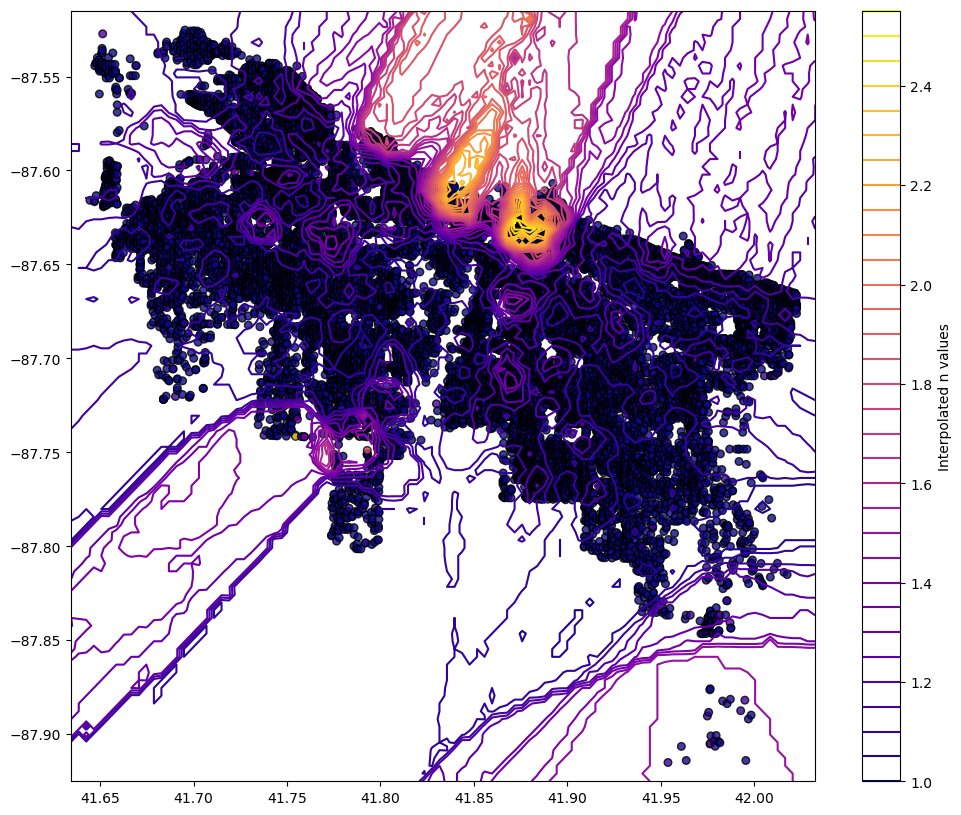

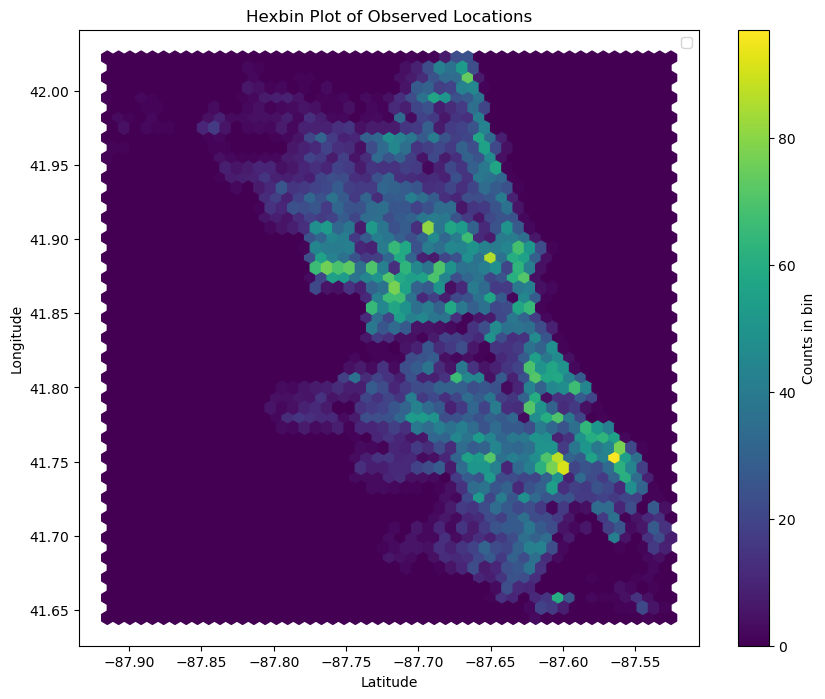

Spatial Interpolation Computation Time: 0.29 seconds


In [72]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import NearestNeighbors
import time

# Assuming 'crimes_df' is your DataFrame containing the data

# Convert columns to numpy arrays
observed_location_columns = ['Latitude', 'Longitude']
observed_values_column = 'n'
observed_locations = crimes_df[observed_location_columns].values
observed_values = crimes_df[observed_values_column].values

# Number of nearest neighbors to consider
n_neighbors = 160

# Initialize NearestNeighbors model
nn_model = NearestNeighbors(n_neighbors=n_neighbors)

# Start timing spatial interpolation
start_time_interpolation = time.time()

# Perform spatial interpolation over the entire dataset for visualization
nn_model.fit(observed_locations)  # Re-fit model using all data

# Adjust the zoom by reducing the buffer around the min and max values
buffer = 0.01  # Smaller buffer to zoom in closer
x_min, x_max = observed_locations[:, 0].min() - buffer, observed_locations[:, 0].max() + buffer
y_min, y_max = observed_locations[:, 1].min() - buffer, observed_locations[:, 1].max() + buffer

x_range = np.linspace(x_min, x_max, 100)
y_range = np.linspace(y_min, y_max, 100)
x_grid, y_grid = np.meshgrid(x_range, y_range)
grid_points = np.c_[x_grid.ravel(), y_grid.ravel()]

# Find nearest neighbors for the grid points
distances, indices = nn_model.kneighbors(grid_points)

# Interpolate values
interpolated_values = np.mean(observed_values[indices], axis=1)
z_grid = interpolated_values.reshape(x_grid.shape)

end_time_interpolation = time.time()  # End timing spatial interpolation

# Visualization
plt.figure(figsize=(12, 10))  # Adjusted figure size for standard display
plt.contour(x_grid, y_grid, z_grid, cmap='plasma', levels=30)
plt.colorbar(label='Interpolated n values')
plt.scatter(crimes_df['Latitude'],crimes_df['Longitude'], c=crimes_df['n'], cmap='plasma', edgecolor='k', label='Observed', marker='o', s=30, alpha=0.8)

plt.xlim(x_min, x_max)  # Set x-axis limits
plt.ylim(y_min, y_max)  # Set y-axis limits

plt.figure(figsize=(10, 8))
hb = plt.hexbin(crimes_df['Longitude'], crimes_df['Latitude'], gridsize=50, cmap='viridis')
plt.colorbar(hb, label='Counts in bin')

plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.legend()
plt.title('Hexbin Plot of Observed Locations')
plt.show()

print(f"Spatial Interpolation Computation Time: {end_time_interpolation - start_time_interpolation:.2f} seconds")


## Downsampling

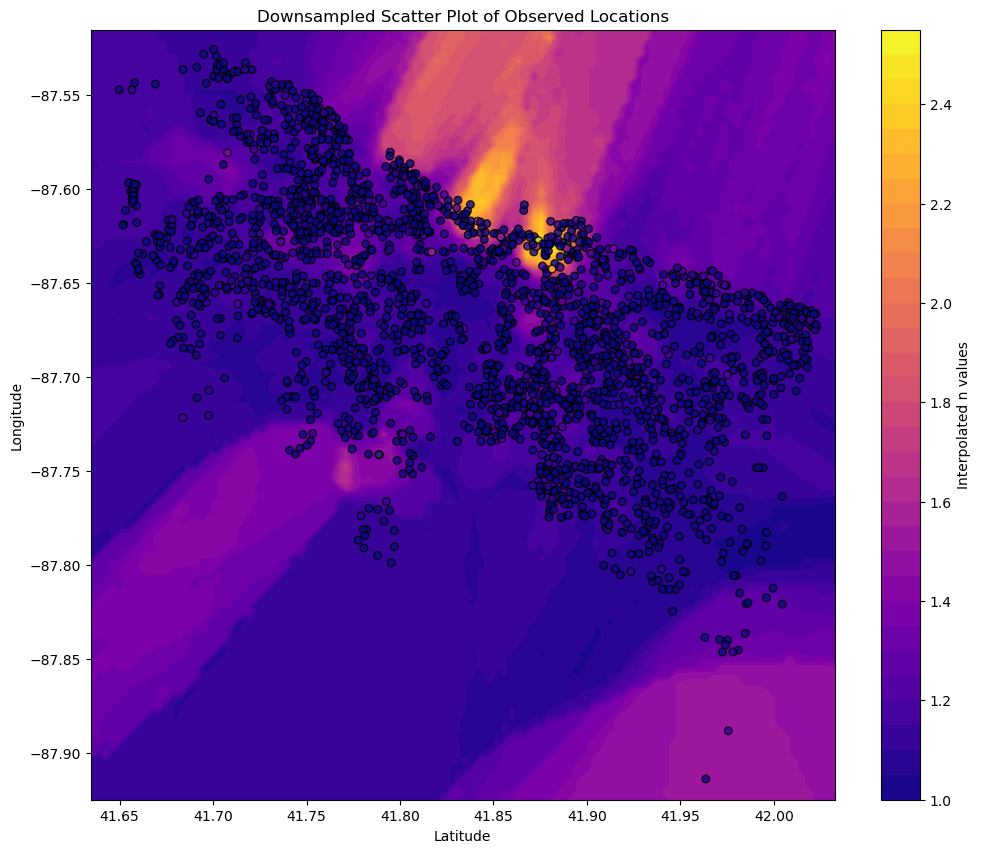

Spatial Interpolation Computation Time: 0.31 seconds


In [85]:
observed_location_columns = ['Latitude', 'Longitude']
observed_values_column = 'n'
observed_locations = crimes_df[observed_location_columns].values
observed_values = crimes_df[observed_values_column].values

# Number of nearest neighbors to consider
n_neighbors = 160

# Initialize NearestNeighbors model
nn_model = NearestNeighbors(n_neighbors=n_neighbors)

# Start timing spatial interpolation
start_time_interpolation = time.time()

# Perform spatial interpolation over the entire dataset for visualization
nn_model.fit(observed_locations)  # Re-fit model using all data

# Adjust the zoom by reducing the buffer around the min and max values
buffer = 0.01  # Smaller buffer to zoom in closer
x_min, x_max = observed_locations[:, 0].min() - buffer, observed_locations[:, 0].max() + buffer
y_min, y_max = observed_locations[:, 1].min() - buffer, observed_locations[:, 1].max() + buffer

x_range = np.linspace(x_min, x_max, 100)
y_range = np.linspace(y_min, y_max, 100)
x_grid, y_grid = np.meshgrid(x_range, y_range)
grid_points = np.c_[x_grid.ravel(), y_grid.ravel()]

# Find nearest neighbors for the grid points
distances, indices = nn_model.kneighbors(grid_points)

# Interpolate values
interpolated_values = np.mean(observed_values[indices], axis=1)
z_grid = interpolated_values.reshape(x_grid.shape)

end_time_interpolation = time.time()  # End timing spatial interpolation

# Visualization
plt.figure(figsize=(12, 10))  # Adjusted figure size for standard display
plt.contourf(x_grid, y_grid, z_grid, cmap='plasma', levels=30)
plt.colorbar(label='Interpolated n values')

# Example of downsampling without specific implementation
sampled_df = crimes_df.sample(frac=0.10)  # Adjust fraction based on dataset size
plt.scatter(sampled_df['Latitude'],sampled_df['Longitude'], c=sampled_df['n'], cmap='plasma', edgecolor='k', label='Observed', marker='o', s=30, alpha=0.8)

plt.xlim(x_min, x_max)  # Set x-axis limits
plt.ylim(y_min, y_max)  # Set y-axis limits

plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Downsampled Scatter Plot of Observed Locations')
plt.show()

print(f"Spatial Interpolation Computation Time: {end_time_interpolation - start_time_interpolation:.2f} seconds")


## Dynamic Interactive Plot

In [89]:
import plotly.express as px

# Assuming crimes_df contains latitude and longitude columns for data points in Chicago
fig = px.scatter_geo(crimes_df,
                     lat='Latitude',
                     lon='Longitude',
                     title='Interactive Map of Observed Locations in Chicago',
                     scope='usa',  # Scope to the USA
                     center={'lat': 41.8781, 'lon': -87.6298})  # Center on Chicago coordinates

fig.update_geos(
    projection_scale=9,  # This scale value zooms in on Chicago, adjust as needed
    center={'lat': 41.8781, 'lon': -87.6298},  # Center the map on Chicago
)

fig.update_layout(
    margin={"r":0,"t":0,"l":0,"b":0},
    geo=dict(
        scope='usa',
        showland=True,
        landcolor="rgb(217, 217, 217)",
        subunitwidth=1,
        countrywidth=1,
        subunitcolor="rgb(255, 255, 255)",
        countrycolor="rgb(255, 255, 255)"
    )
)

fig.show()


## Density Estimation Plots

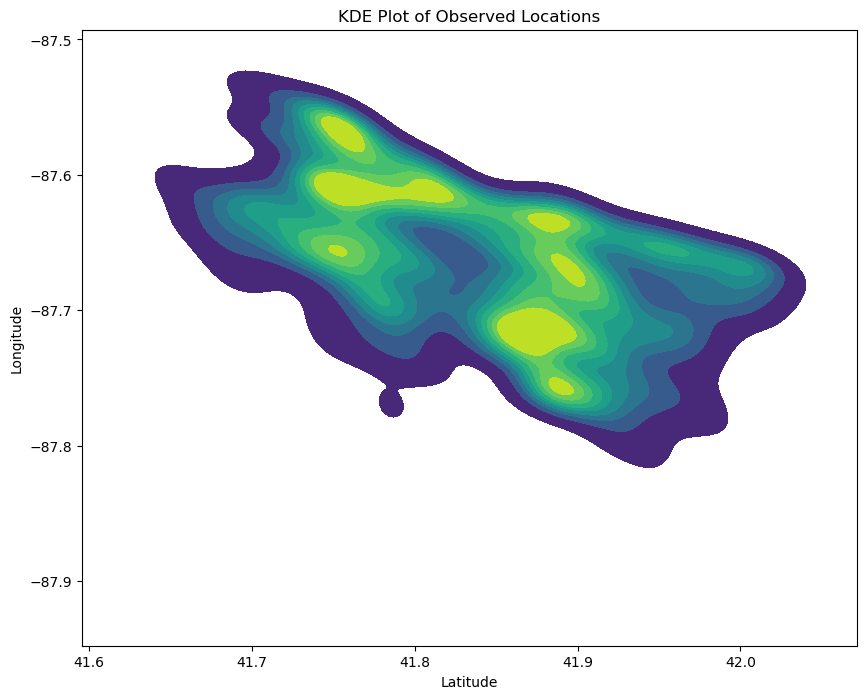

In [94]:
# Assuming you have seaborn installed
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.kdeplot(data=crimes_df, x='Latitude', y='Longitude', fill=True, cmap='viridis')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('KDE Plot of Observed Locations')
plt.show()
